In [1]:
import numpy as np
import PyDSTool as dst
from PyDSTool.Toolbox import phaseplane as pp

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [3]:
mpl.rcParams['figure.figsize'] = [6, 4]
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8

In [4]:
figdir = './figures/'
plt.rc('text', usetex=True)

# Carryover of a saddle-node bifurcation
# Application: cell cycle

## 1. Original system: bifurcation diagrams

The cell cycle model is
$$
\begin{aligned}
    \frac{dY}{dt} &= k_{1} - (k_{2p} + k_{2pp}P)Y, \\
    \frac{dP}{dt} &= \frac{(k_{3p}+k_{3pp}A)(1-P)}{J_{3}+(1-P)} - k_{4}m\frac{YP}{J_{4}+P}, \\
    \frac{dA}{dt} &= k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A,
\end{aligned}
$$
where $k_1, k_{2p}, k_{pp},k_{3p}, k_{3pp}, k_{4}, k_{5p}, k_{5pp}, k_{6}, J_{3}, J_{4}0$ are non-negative rate (add references here in markdown syntax: Segel2013, TysonNovak2011).


We can construct the bifurcation diagram using continuation and the `PyDSTool` library of python.

In [5]:
# dynamical system
Ystr = 'k1 - (k2p + k2pp*P)*Y'
Pstr = '(k3p + k3pp*A)*(1 - P)/(J3 + 1 - P) - k4*m*Y*P/(J4 + P)'
Astr = 'k5p + k5pp*(m*Y/J5)**n/(1 + (m*Y/J5)**n) - k6*A'
params = {'k1': 0.04,
          'k2p':  0.04,
          'k2pp':  1.0,
          'k3p':  1.0,
          'k3pp':  10.0,
          'k4':  35.0,
          'k5p':  0.005,
          'k5pp':  0.2,
          'k6':  0.1,
          'J3':  0.04,
          'J4':  0.04,
          'J5':  0.3,
          'm': 1.0,
          'n': 4}
ics = {'A':  0.5589948209351,
       'P':  0.9899006517009776,
       'Y':  0.03951157409159911}
DSargs = dst.args(name='CellCycle')
DSargs.pars = params
DSargs.tdata = [0, 100]
DSargs.pdomain = {'m': [0, 4.0], 
                  'k1': [0, 1.0], 
                  'k2p': [0, 10.0], 
                  'k3p': [0, 10.0], 
                  'k4': [0, 200.0], 
                  'k5p': [0, 1.0], 
                  'k5pp': [0, 10.0],
                  'k6': [0, 10.0]}
DSargs.xdomain = {'Y': [0, 5.0], 'P': [0, 10.0], 'A': [0, 10.0]}
DSargs.varspecs = {'Y': Ystr, 'P': Pstr, 'A': Astr}
DSargs.ics = ics
DS = dst.Generator.Vode_ODEsystem(DSargs)

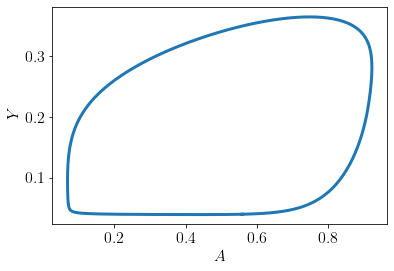

In [6]:
traj = DS.compute('cycle')
cycle = traj.sample(dt=0.0001, tlo=0, thi=56.45, precise=True)
cycle.indepvararray = cycle.indepvararray.flatten()
plt.plot(cycle['A'], cycle['Y'])
plt.xlabel('$A$')
plt.ylabel('$Y$')
plt.show()

In [7]:
PC = dst.ContClass(DS)
name3 = 'LC2'
PCargs = dst.args(name=name3)
PCargs.type = 'LC-C'
PCargs.initcycle = cycle
PCargs.freepars = ['m']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 200
PCargs.SolutionMeasures = 'min'
PCargs.NumSPOut = 10
PCargs.SaveEigen = True
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name3].backward()
PC.curves[name3].forward()

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "_auto_CellCycle_vf" sources
swig: /home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks/auto_temp/auto_CellCycle_vf.i
swig -python -I/home/shigoto/.local/lib/python3.8/site-packages/numpy/core/include -I/home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks -I/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/auto/module/include -I/home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks/auto_temp -I/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/auto/src/include -o auto_temp/src.linux-x86_64-3.8/auto_temp/auto_CellCycle_vf_wrap.c -outdir auto_temp/src.linux-x86_64-3.8/auto_

In [8]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'A': 0.5420835741849908, 'P': 0.1364100558653051, 'Y': 0.22674444381187284},)

In [9]:
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[0]
PCargs.freepars = ['m']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  4.336808689942018e-17
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

H Point found 
0 : 
A  =  0.37364259051196586
P  =  0.07504313754250196
Y  =  0.3476956631613273
m  =  0.57193509118366

Eigenvalues = 

     (-21.454000,0.000000)
     (-0.000000,0.196742)
     (-0.000000,-0.196742)


w = 0.19674244198213528
l1 = -19.039875813945585


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
A  =  0.05877906321394411
P  =  0.05155301918539704
Y  =  0.43690530750273837
m  =  0.17693596365829772

Eigenvalues = 

     (-13.094156,0.000000)
     (-0.074183,0.000000)
     (0.000000,0.000000)


a = 0.3849696052029802

Neutral saddle found!

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
A  =  0.05044322270606159
P  =  0.8268816067931901
Y  =  0.0461424024763542
m  =  0.7933103435606997

Eige

Indeed there is a bifurcation point (`LP1`) at which a critical transition drives gen activation.

In [10]:
name2 = 'LC1'
PCargs = dst.args(name=name2)
PCargs.type = 'LC-C'
PCargs.initpoint = 'EQ1:H1'
PCargs.freepars = ['m']
PCargs.StepSize = 1e-1
PCargs.NumSPOut = 30
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-1
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 200
PCargs.SolutionMeasures = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

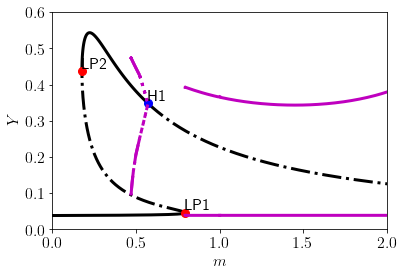

In [11]:
PC[name1].display(('m', 'Y'), stability=True, linewidth=3)
PC[name2].display(('m', 'Y_min'), stability=True, linewidth=3)
PC[name2].display(('m', 'Y_max'), stability=True, linewidth=3)
PC[name3].display(('m', 'Y_min'), stability=True, linewidth=3)
PC[name3].display(('m', 'Y_max'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P','B','MX','RG'])
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
PC.plot.fig1.axes1.axes.set_xlim((0.0, 2.0))
PC.plot.fig1.axes1.axes.set_ylabel('$Y$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.6))
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleOriginalBifurcation.pdf', bbox_inches='tight')
plt.show()

In [12]:
# Two-parameter bifurcation
namefold = 'FO1'
PCargs = dst.args(name=namefold)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP1'
PCargs.freepars = ['m', 'k5p']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold].forward()
PC.curves[namefold].backward()


Checking...
  <b,c> = 0.000000


BT Point found 
0 : 
A  =  0.23255380667499473
P  =  0.8146179273204966
Y  =  0.04680454121225017
m  =  1.7517506487401528
k5p  =  0.022145771844677486

Eigenvalues = 

     (-3.730463,0.000000)
     (-0.000003,0.000000)
     (0.000003,0.000000)



Checking...
  |a| = -14.075876


CP Point found 
0 : 
A  =  0.41819839698305905
P  =  0.714837524346354
Y  =  0.05299153620461265
m  =  2.587376358633661
k5p  =  0.033458745341390636

Eigenvalues = 

     (-3.809747,0.000000)
     (0.000000,0.000000)
     (0.657573,0.000000)


Maximum test function iterations reached.


Checking...
  <b,c> = 0.000009


BT Point found 
0 : 
A  =  0.15113534522436148
P  =  0.07567538861036538
Y  =  0.3457952506624707
m  =  0.30402433357682906
k5p  =  0.012142184326988733

Eigenvalues = 

     (-11.323212,0.000000)
     (-0.000000,0.000001)
     (-0.000000,-0.000001)


B Point found 
0 : 
A  =  -2.5415356274901195e-08
P  =  0.04344890734497954
Y  =  0.4793352156744145
m  =  0.1

In [13]:
# Two-parameter bifurcation
namefold2 = 'FO3'
PCargs = dst.args(name=namefold2)
PCargs.type = 'H-C1'
PCargs.initpoint = 'EQ1:H1'
PCargs.freepars = ['m', 'k5p']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 2000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)
PC.curves[namefold2].forward()
PC.curves[namefold2].backward()

B Point found 
0 : 
A  =  0.408487746527264
P  =  0.07499996346456002
Y  =  0.3478261974607231
m  =  0.6139050828706146
k5p  =  -5.12192284967156e-10

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  1.1168440202394181e-16
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

GH Point found 
0 : 
A  =  0.19170834726566013
P  =  0.07552374926299804
Y  =  0.34624915011143853
m  =  0.3529263223512578
k5p  =  0.013812355672662672

Eigenvalues = 

     (-13.160082,0.000000)
     (-0.000000,0.072867)
     (-0.000000,-0.072867)


w = 0.07286736452908321
l1 = -1.4024730781159178e-05


Checking...
  <b,c> = -443228.324236


BT Point found 
0 : 
A  =  0.15113584007926847
P  =  0.07567556134402686
Y  =  0.34579473430033614
m  =  0.304025144313889
k5p  =  0.012142220073077916

Eigenvalues = 

     (-11.323193,0.000000)
     (0.000000,0.000013)
     (0.000000,-0.000013)


B Point found 
0 : 
A  =  -3.4769289539008344e-09
P  =  0.07670493457792477
Y  =  0.3427447189329573
m  =  0.12156491849705597
k5p  =  

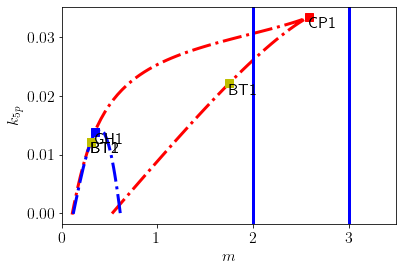

In [14]:
PC[namefold].display(('m', 'k5p'), stability=True, linewidth=3)
PC[namefold2].display(('m', 'k5p'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['B', 'P'])
PC.plot.fig1.axes1.axes.set_xlim((0.0, 3.5))
PC.plot.fig1.axes1.axes.set_xlabel('$m$', fontsize=16)
# PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.03))
PC.plot.fig1.axes1.axes.set_ylabel('$k_{5p}$', fontsize=16)
plt.axvline(x=2.0, lw=3, color='b')
plt.axvline(x=3.0, lw=3, color='b')
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleTwoParBifurcation.pdf', bbox_inches='tight')
plt.show()

**In order to run the following lines, we nee to restart the notebook, otherwise, the continuation of the limit cycle would not work. Supposedly, building AUTO for two system will collide.**

In [1]:
import numpy as np
import PyDSTool as dst
from PyDSTool.Toolbox import phaseplane as pp

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [3]:
mpl.rcParams['figure.figsize'] = [6, 4]
mpl.rcParams['font.size'] = 16
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 8

In [4]:
figdir = './figures/'
plt.rc('text', usetex=True)

## 2. Extended system: bifurcation diagram

The cell cycle model is
$$
\begin{aligned}
    \frac{dY}{dt} &= k_{1} - (k_{2p} + k_{2pp}P)Y, \\
    \frac{dP}{dt} &= \frac{(k_{3p}+k_{3pp}A)(1-P)}{J_{3}+(1-P)} - k_{4}m\frac{YP}{J_{4}+P}, \\
    \frac{dA}{dt} &= k_{5p} + k_{5pp}\frac{(mY/J_{5})^{n}}{1+(mY/J_{5})^{n}} - k_{6}A, \\
    \frac{dm}{dt} &= \mu m \left( 1 - \frac{m}{K}\right),
\end{aligned}
$$
where $k_1, k_{2p}, k_{pp},k_{3p}, k_{3pp}, k_{4}, k_{5p}, k_{5pp}, k_{6}, J_{3}, J_{4}0$ are non-negative rate.


We can construct the bifurcation diagram using continuation and the `PyDSTool` library of python.

In [5]:
# dynamical system
Ystr = 'k1 - (k2p + k2pp*P)*Y'
Pstr = '(k3p + k3pp*A)*(1 - P)/(J3 + 1 - P) - k4*m*Y*P/(J4 + P)'
Astr = 'k5p + k5pp*(m*Y/J5)**n/(1 + (m*Y/J5)**n) - k6*A'
mstr = 'mu*m*(1 - m/K)'
params = {'k1': 0.04,
          'k2p':  0.04,
          'k2pp':  1.0,
          'k3p':  1.0,
          'k3pp':  10.0,
          'k4':  35.0,
          'k5p':  0.005,
          'k5pp':  0.2,
          'k6':  0.1,
          'J3':  0.04,
          'J4':  0.04,
          'J5':  0.3,
          'mu': 0.1,
          'K': 2.0,
          'n': 4}
ics = {'A':  0.8850704900359198,
'P':  0.9854966451671725,
'Y':  0.03899139282479138,
'm':  2.0}
DSargs = dst.args(name='CellCycle')
DSargs.pars = params
DSargs.tdata = [0, 100]
DSargs.pdomain = {'mu': [0, 1.0],
                  'K': [1.0, 5.0],
                  'k1': [0, 1.0], 
                  'k2p': [0, 10.0], 
                  'k3p': [0, 10.0], 
                  'k4': [0, 200.0], 
                  'k5p': [0, 0.04], 
                  'k5pp': [0, 10.0],
                  'k6': [0, 10.0]}
DSargs.xdomain = {'Y': [0, 5.0], 'P': [0, 10.0], 'A': [0, 10.0], 'm': [0, 2.0]}
DSargs.varspecs = {'Y': Ystr, 'P': Pstr, 'A': Astr, 'm': mstr}
DSargs.ics = ics
DS = dst.Generator.Vode_ODEsystem(DSargs)

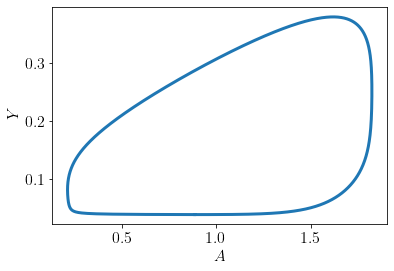

In [6]:
traj = DS.compute('cycle')
cycle = traj.sample(dt=0.0001, tlo=0, thi=53.32, precise=True)
cycle.indepvararray = cycle.indepvararray.flatten()
plt.plot(cycle['A'], cycle['Y'])
plt.xlabel('$A$')
plt.ylabel('$Y$')
plt.show()

In [7]:
PC = dst.ContClass(DS)
name3 = 'LC2'
PCargs = dst.args(name=name3)
PCargs.type = 'LC-C'
PCargs.initcycle = cycle
PCargs.freepars = ['k5p']
PCargs.StepSize = 2e-2
PCargs.MaxNumPoints = 50000
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.MaxTestIters = 1000
PCargs.SolutionMeasures = 'min'
PCargs.NumSPOut = 40
PCargs.SaveEigen = True
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name3].backward()
PC.curves[name3].forward()

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "_auto_CellCycle_vf" sources
swig: /home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks/auto_temp/auto_CellCycle_vf.i
swig -python -I/home/shigoto/.local/lib/python3.8/site-packages/numpy/core/include -I/home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks -I/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/auto/module/include -I/home/shigoto/Documents/Work/Projects/2020-05 Saddle-node Bifurcation Carryover/codes/notebooks/auto_temp -I/home/shigoto/.local/lib/python3.8/site-packages/PyDSTool/PyCont/auto/src/include -o auto_temp/src.linux-x86_64-3.8/auto_temp/auto_CellCycle_vf_wrap.c -outdir auto_temp/src.linux-x86_64-3.8/auto_

In [8]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'A': 0.051215411878439525,
  'P': 1.6581629493592063,
  'Y': 0.02355486557700103,
  'm': 2.0},
 {'A': 0.05000000000000002,
  'P': 0.9999999999999956,
  'Y': 0.03846153846154625,
  'm': -1.583327336586685e-19},
 {'A': 0.7127848739479983,
  'P': 0.277816108256646,
  'Y': 0.12585894471937878,
  'm': 2.0},
 {'A': 0.055562950271203844,
  'P': 1.120372749494177,
  'Y': 0.034471681636286694,
  'm': 2.0})

In [9]:
name1 = 'EQ1'
PCargs = dst.args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[2]
PCargs.freepars = ['k5p']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Neutral saddle found!

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
A  =  0.42325685315315825
P  =  0.49418945769437567
Y  =  0.07487980046001787
m  =  2.0
k5p  =  0.030631818510688053

Eigenvalues = 

     (-3.262166,0.000000)
     (-0.000000,0.000000)
     (1.190667,0.000000)
     (-0.100000,0.000000)


a = 0.1897815445176204


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
A  =  0.2803176459936144
P  =  0.8061908131345967
Y  =  0.04727066210022481
m  =  2.0
k5p  =  0.02607846297252048

Eigenvalues = 

     (-3.979172,0.000000)
     (0.000000,0.000000)
     (0.065326,0.000000)
     (-0.100000,0.000000)


a = 4.20609782177662

Checking...
  |q| = 1.000000
  |<p,q> - 1| =  2.3592239273284576e-16
  |Aq - iwq| = 0.000000
  |A*p + iwp| = 0.000000

H Point found 
0 : 
A  =  0.27

In [10]:
name2 = 'EQ2'
PCargs = dst.args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = fps[0]
PCargs.freepars = ['k5p']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 5000
PCargs.MaxStepSize = 5e-3
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
A  =  0.00019426821331178064
P  =  2.6460568996415366
Y  =  0.014891717299562098
m  =  2.0
k5p  =  -7.1106153670900636e-12

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Maximum test function iterations reached.

Neutral saddle found!

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000004

LP Point found 
0 : 
A  =  0.07661331695998193
P  =  1.2629326875349751
Y  =  0.030699974283150574
m  =  2.0
k5p  =  0.0073110191871714044

Eigenvalues = 

     (-2.835345,0.000000)
     (-0.039687,0.000000)
     (-0.000000,0.000000)
     (-0.100000,0.000000)


a = 6.43066659482632

B Point found 
0 : 
A  =  0.006609306830907341
P  =  1.0712910661422828
Y  =  0.03599417040114912
m  =  2.0
k5p  =  -2.265097847256428e-10



Indeed there is a bifurcation point (`LP1`) at which a critical transition drives gen activation.

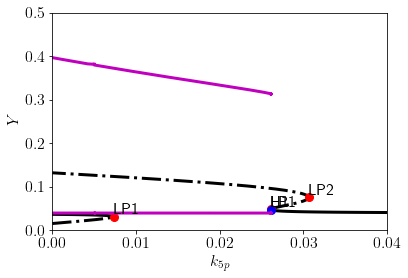

In [11]:
PC[name1].display(('k5p', 'Y'), stability=True, linewidth=3)
PC[name2].display(('k5p', 'Y'), stability=True, linewidth=3)
PC[name3].display(('k5p', 'Y_min'), stability=True, linewidth=3)
PC[name3].display(('k5p', 'Y_max'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P', 'B', 'MX', 'RG'])
PC.plot.fig1.axes1.axes.set_xlabel('$k_{5p}$', fontsize=16)
PC.plot.fig1.axes1.axes.set_xlim((0.0, 0.04))
PC.plot.fig1.axes1.axes.set_ylabel('$Y$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((0.0, 0.5))
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(figdir + 'ApplicationCellCycleExtendedlBifurcation.pdf', bbox_inches='tight')
plt.show()